Saving KEDces.jpg to KEDces (1).jpg


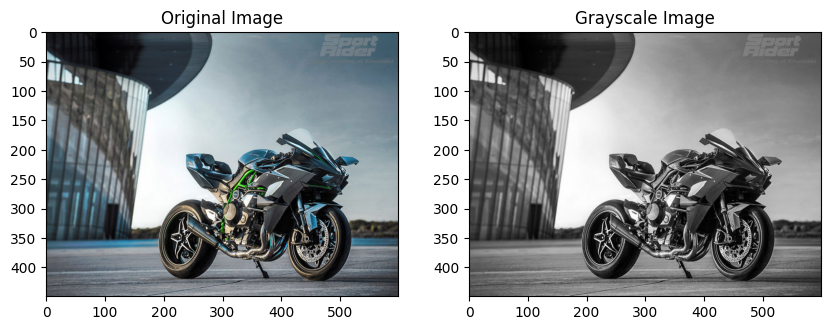

In [ ]:
!pip install opencv-python-headless numpy matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the image
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale Image')
plt.show()

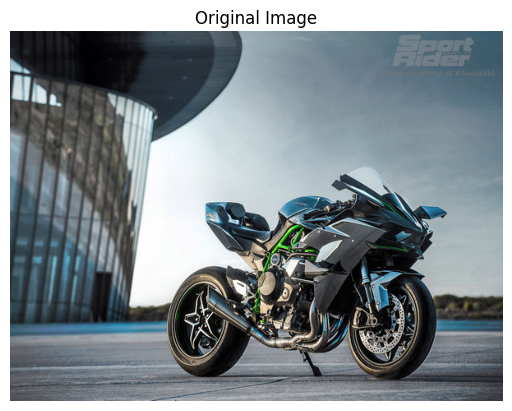

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("/content/KEDces.jpg")  # Use a sample image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [ ]:
resized_image = cv2.resize(image, (224, 224))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("Resized Image (224x224)")
plt.axis('off')
plt.show()

In [ ]:
normalized = image / 255.0
plt.imshow(normalized)
plt.title("Normalized Image")
plt.axis('off')
plt.show()

In [ ]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blurred Image")
plt.axis('off')
plt.show()

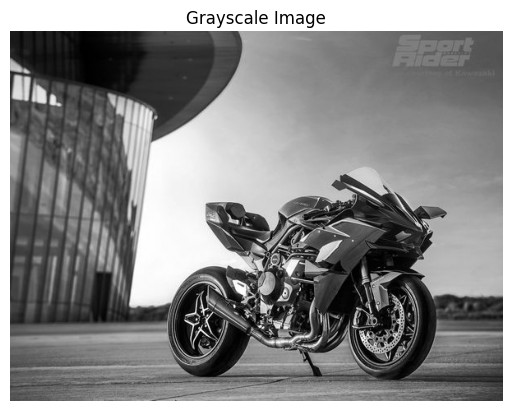

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

In [ ]:
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

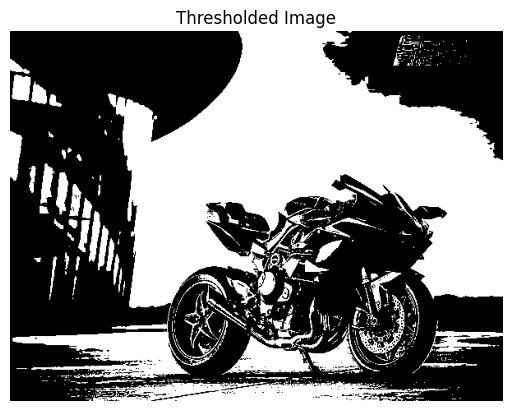

In [ ]:
ret, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()

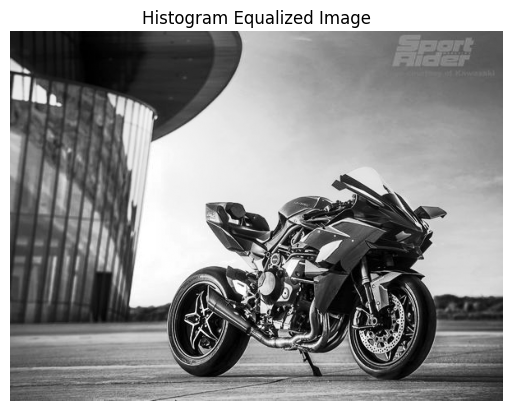

In [ ]:
equalized = cv2.equalizeHist(gray_image)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()

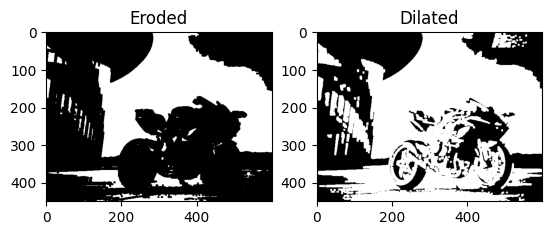

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

eroded = cv2.erode(thresh, kernel, iterations=1)
dilated = cv2.dilate(thresh, kernel, iterations=1)

plt.subplot(1,2,1), plt.imshow(eroded, cmap='gray'), plt.title('Eroded')
plt.subplot(1,2,2), plt.imshow(dilated, cmap='gray'), plt.title('Dilated')
plt.show()

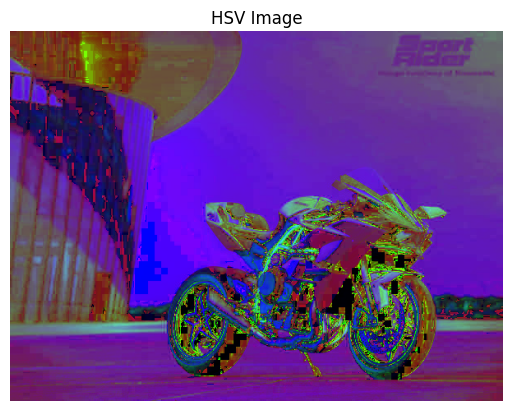

In [ ]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)
plt.title("HSV Image")
plt.axis('off')
plt.show()

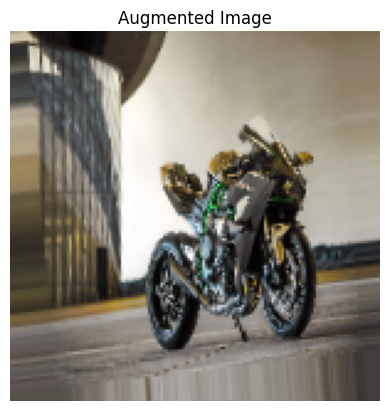

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

img_array = cv2.resize(image, (150,150))  # Resize for augmentation
img_array = np.expand_dims(img_array, 0)

aug_iter = datagen.flow(img_array)
aug_image = next(aug_iter)[0].astype(np.uint8)

plt.imshow(aug_image)
plt.title("Augmented Image")
plt.axis('off')
plt.show()

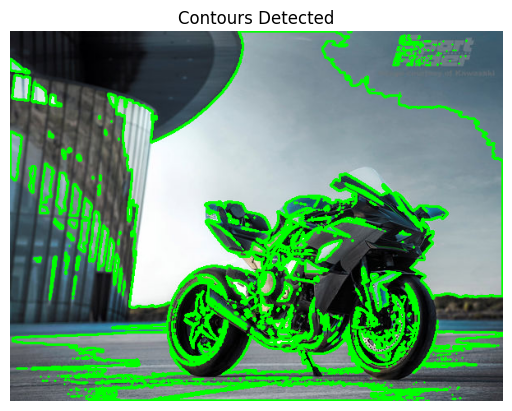

In [ ]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title("Contours Detected")
plt.axis('off')
plt.show()

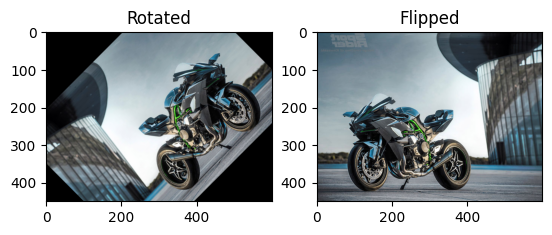

In [ ]:
# Rotate
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

# Flip
flipped = cv2.flip(image, 1)  # Horizontal flip

plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)), plt.title("Rotated")
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)), plt.title("Flipped")
plt.show()

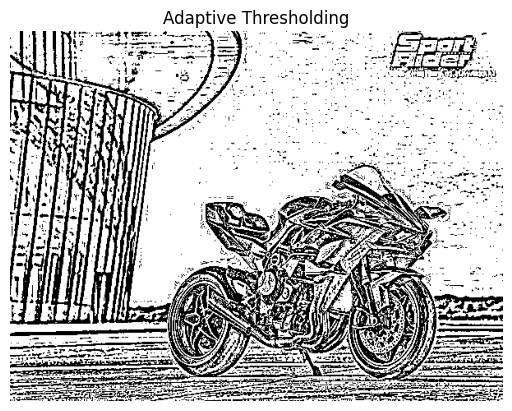

In [ ]:
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 2
)

plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')
plt.show()

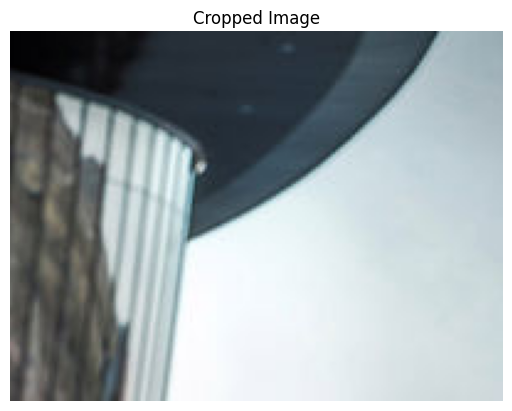

In [ ]:
cropped = image[50:200, 100:300]  # [y1:y2, x1:x2]
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.axis('off')
plt.show()

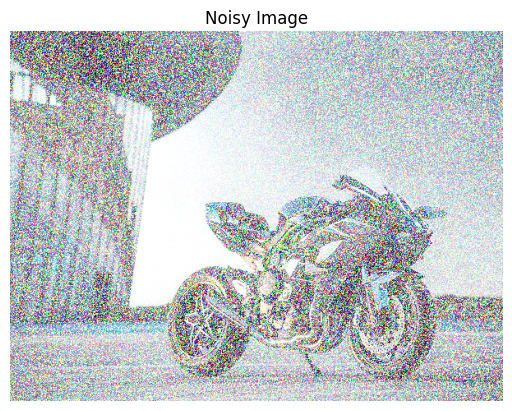

In [ ]:
import numpy as np

noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy_img = cv2.add(image, noise)

plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis('off')
plt.show()

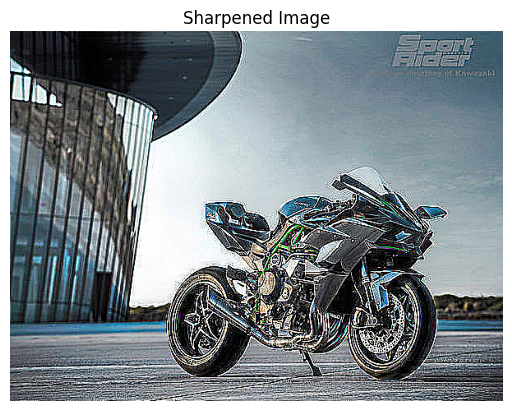

In [ ]:
sharpen_kernel = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])
sharpened = cv2.filter2D(image, -1, sharpen_kernel)

plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Image")
plt.axis('off')
plt.show()

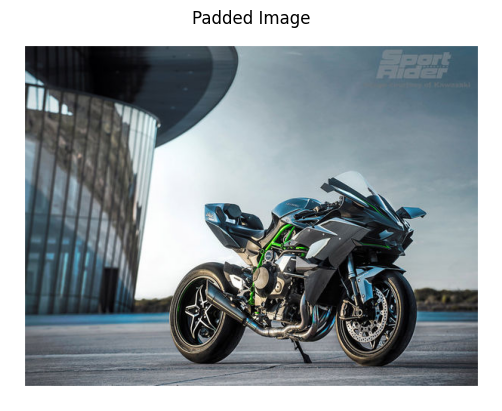

In [ ]:
padded = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=[255,255,255])
plt.imshow(cv2.cvtColor(padded, cv2.COLOR_BGR2RGB))
plt.title("Padded Image")
plt.axis('off')
plt.show()

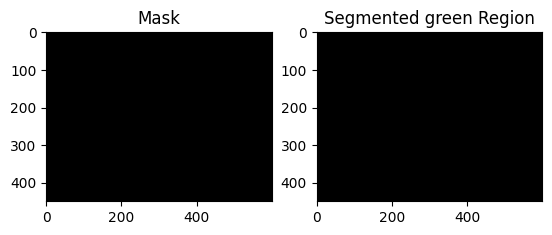

In [ ]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_green = np.array([0, 100, 100])
upper_green = np.array([10, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)
result = cv2.bitwise_and(image, image, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Segmented green Region")
plt.show()